In [40]:
# !pip install mplfinance

# download the sybmol from yfinance

In [41]:
import yfinance as yf
import pytz
import pandas as pd

# Define timezone
et_tz = pytz.timezone("America/New_York")

# Define stock symbol and interval
symbol = "NVDA"
interval = "5m"  # Supports "1m", "5m", "15m", "30m", "1h", "1d"

# Get historical data
data = yf.download(symbol, interval=interval, period="14d")

# Reset index to include Datetime as a column
data.reset_index(inplace=True)

# Ensure correct column ordering
columns_order = ["Datetime", "Close", "High", "Low", "Open", "Volume"]
data = data[columns_order]  # Reorder the columns properly

# Save to CSV without extra index
csv_filename = f"{symbol.lower()}.csv"
data.to_csv(csv_filename, index=False)

print(f"Cleaned data saved to {csv_filename}")
print(data.tail(2))  # Show first 10 rows for verification

[*********************100%***********************]  1 of 1 completed

Cleaned data saved to nvda.csv
Price                   Datetime       Close        High         Low  \
Ticker                                  NVDA        NVDA        NVDA   
1028   2025-03-12 14:40:00+00:00  113.730003  114.129997  113.410004   
1029   2025-03-12 14:45:00+00:00  114.355003  114.510002  113.650002   

Price         Open   Volume  
Ticker        NVDA     NVDA  
1028    113.960503  4154057  
1029    113.699997  2492828  


# download daily interval for ATR and pivot calculation.


In [42]:
import yfinance as yf
import pytz
import pandas as pd

# Define timezone
et_tz = pytz.timezone("America/New_York")

# Define stock symbol and interval
# symbol = "SNOW"
interval = "1d"  # Supports "1m", "5m", "15m", "30m", "1h", "1d"

# Get historical data
data = yf.download(symbol, interval=interval, period="100d")

# Reset index to include Datetime as a column
data.reset_index(inplace=True)

# Ensure correct column ordering
columns_order = ["Date", "Close", "High", "Low", "Open", "Volume"]
data = data[columns_order]  # Reorder the columns properly

# Save to CSV without extra index
csv_filename = f"{symbol.lower()}-daily.csv"
data.to_csv(csv_filename, index=False)

print(f"Cleaned data saved to {csv_filename}")
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import mplfinance as mpf
# Load data from CSV
filename = f"{symbol.lower()}-daily.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Date"], index_col="Date",skiprows=[1])

# Convert to Eastern Time (ET) only if not already timezone-aware
et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)
print(data.tail(3))  # Show first 10 rows for verification

[*********************100%***********************]  1 of 1 completed

Cleaned data saved to nvda-daily.csv
                                Close        High         Low        Open  \
Date                                                                        
2025-03-09 20:00:00-04:00  106.980003  111.849998  105.459999  109.900002   
2025-03-10 20:00:00-04:00  108.760002  112.239998  104.769997  106.989998   
2025-03-11 20:00:00-04:00  114.334999  116.760002  113.410004  114.120003   

                              Volume  
Date                                  
2025-03-09 20:00:00-04:00  366487400  
2025-03-10 20:00:00-04:00  353708300  
2025-03-11 20:00:00-04:00  119794411  


# Calculate ATR price for ACD Levels

In [43]:

from finta import TA
atr=TA.ATR(data, period=20)[-1]
print(atr)

7.022000885009764


# Read file from csv based on symbol

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
import mplfinance as mpf
# Load data from CSV
filename = f"{symbol.lower()}.csv"
data = pd.read_csv(filename, header=0, parse_dates=["Datetime"], index_col="Datetime",skiprows=[1])

# Convert to Eastern Time (ET) only if not already timezone-aware
et_tz = pytz.timezone("America/New_York")
if data.index.tz is None:
    data.index = data.index.tz_localize("UTC").tz_convert(et_tz)
else:
    data.index = data.index.tz_convert(et_tz)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


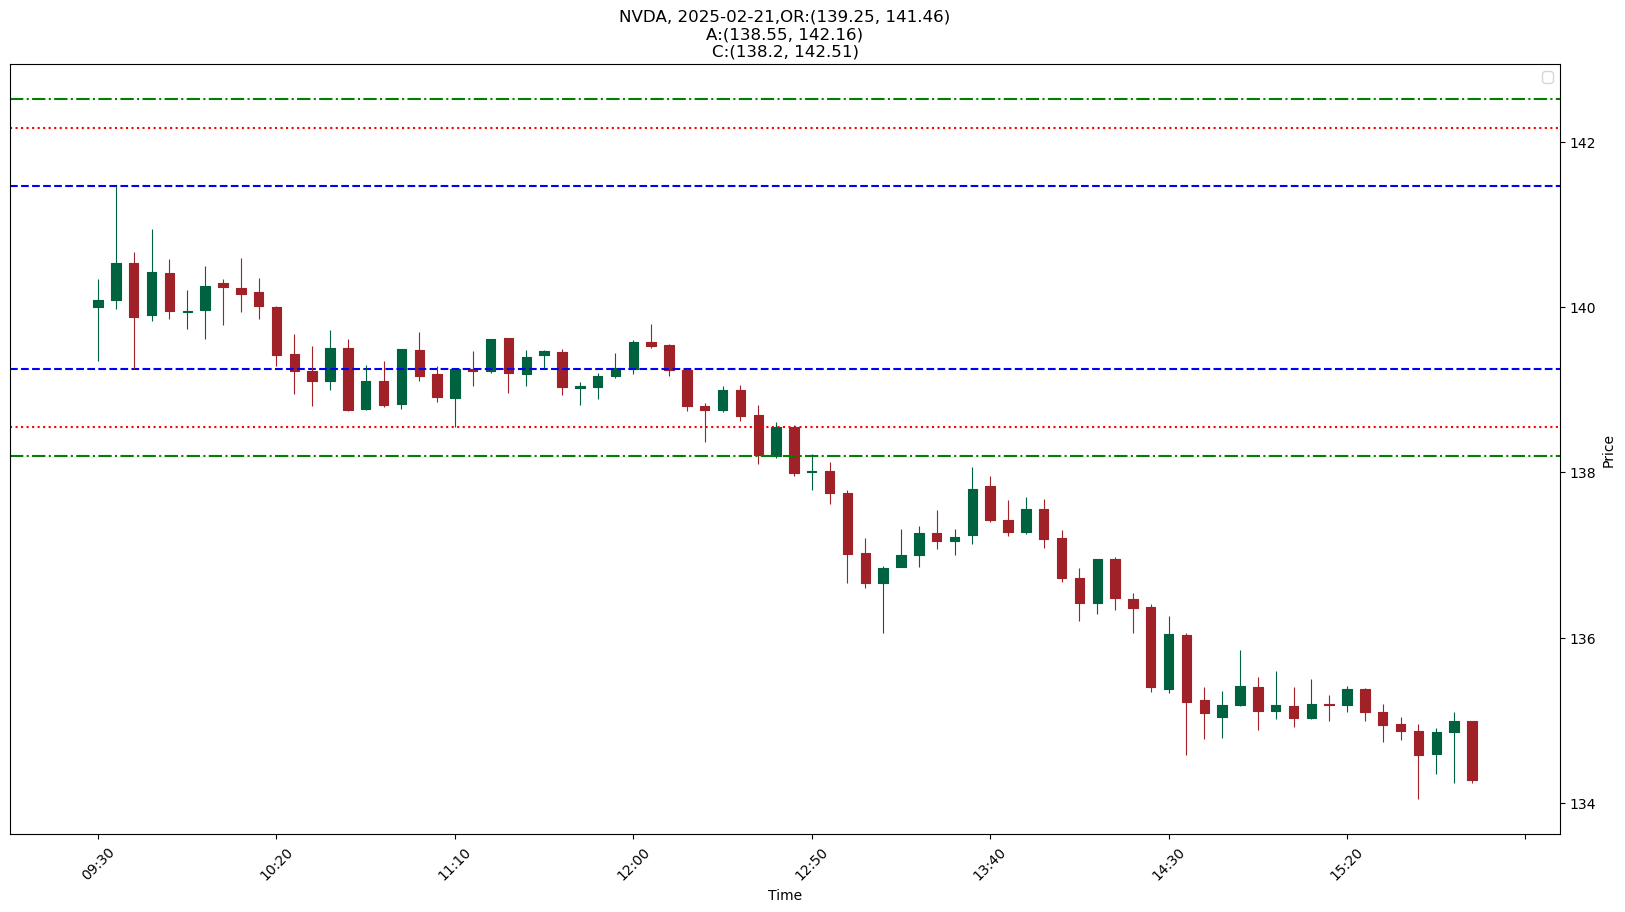

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


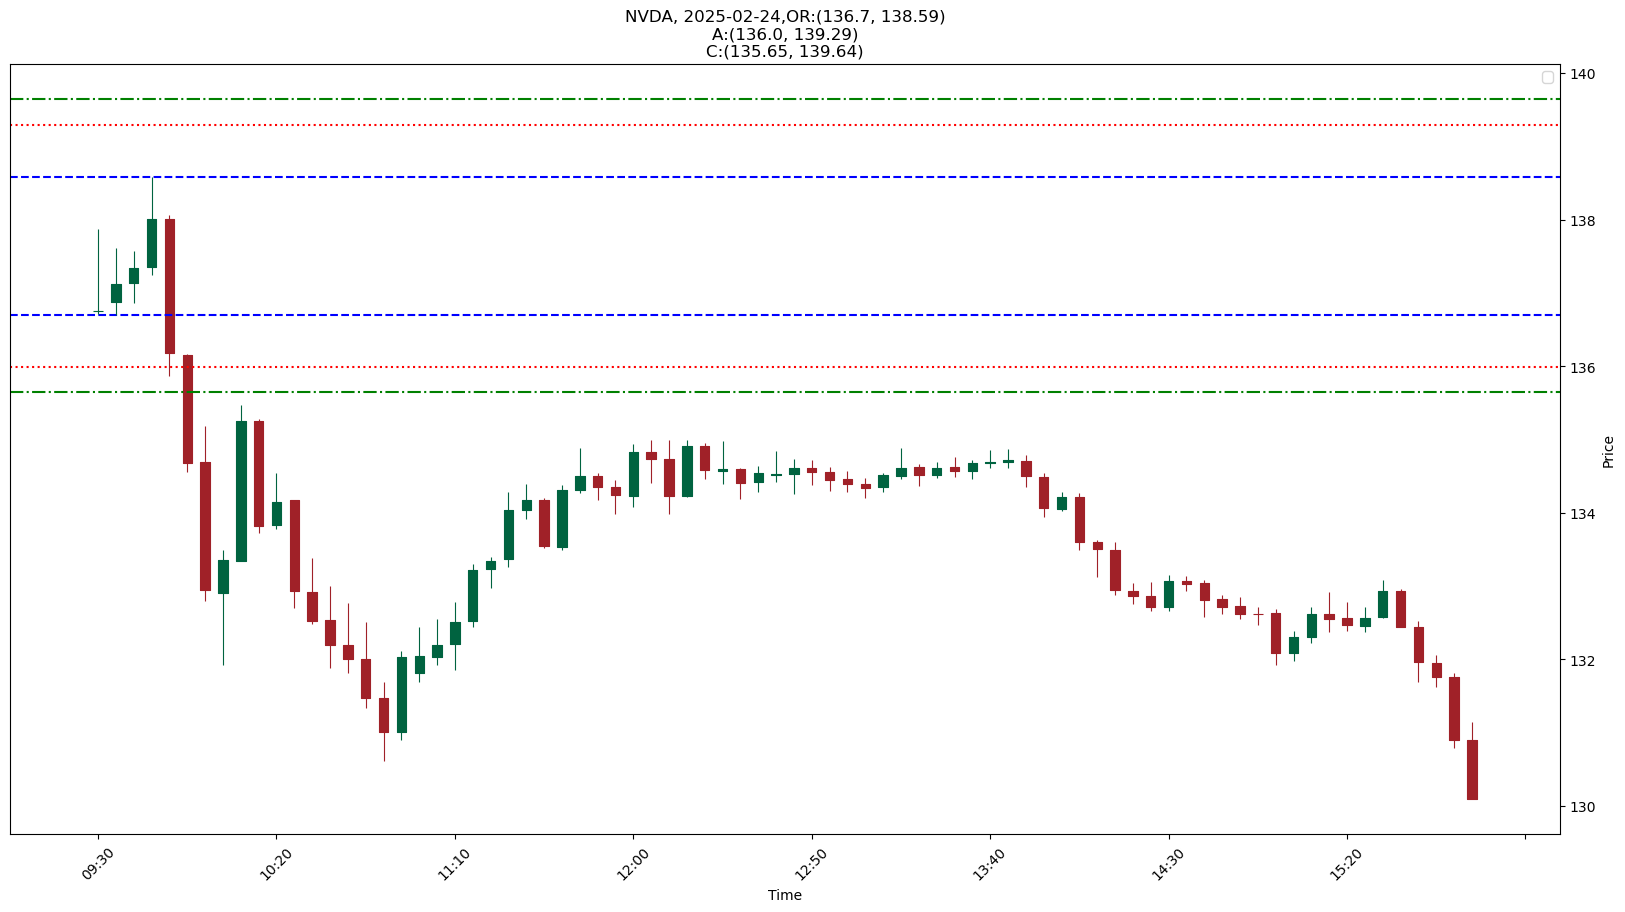

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


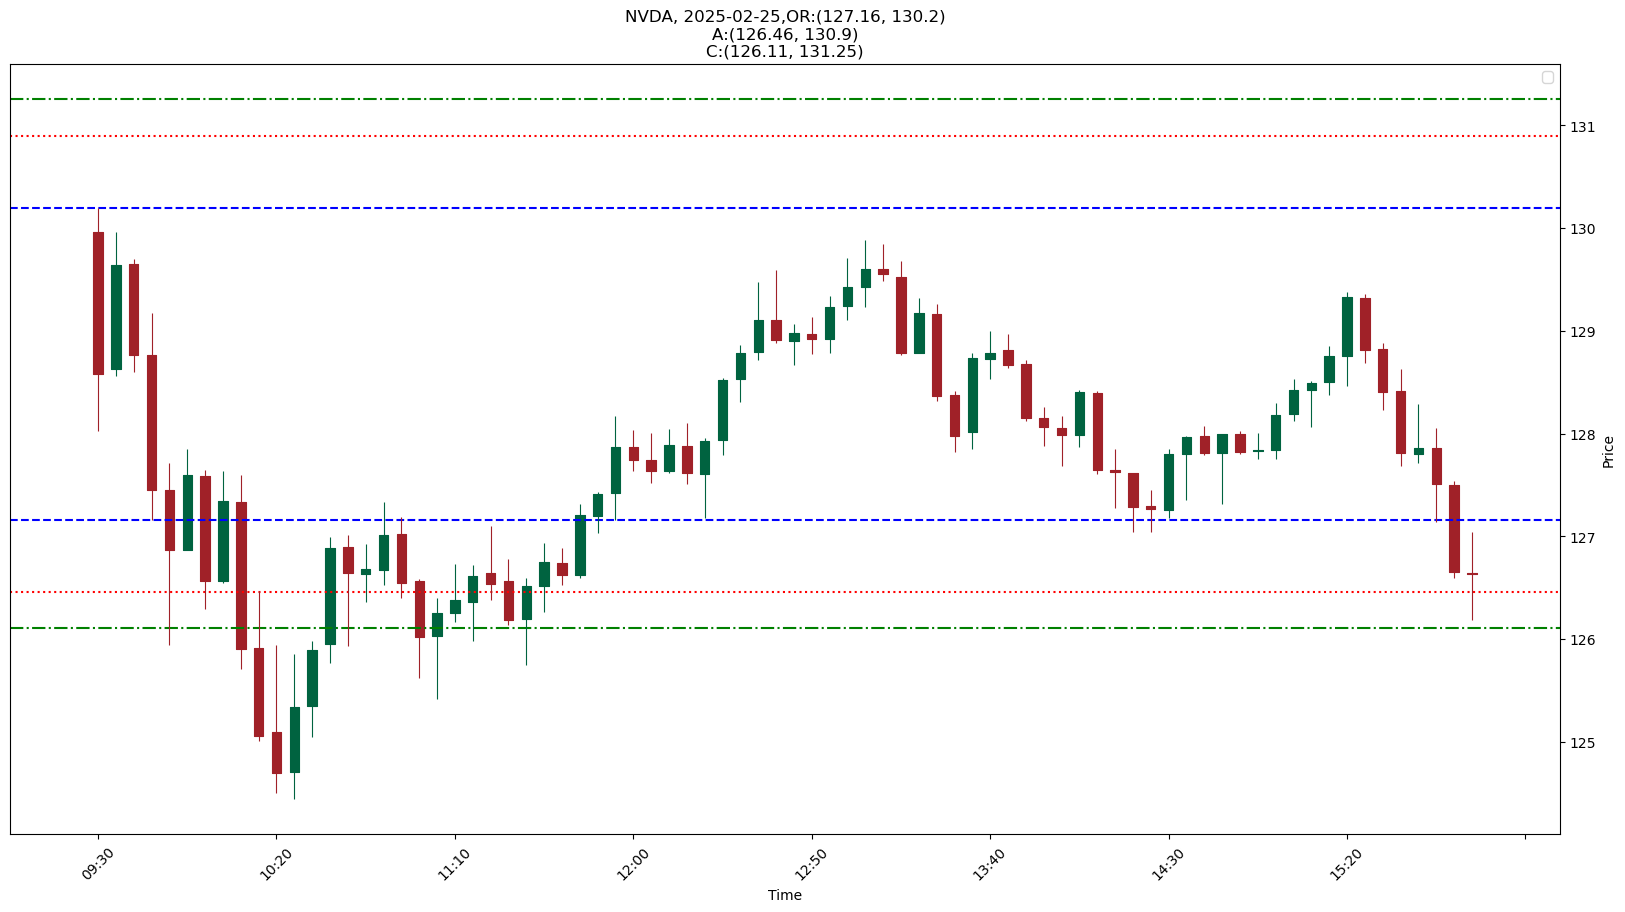

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


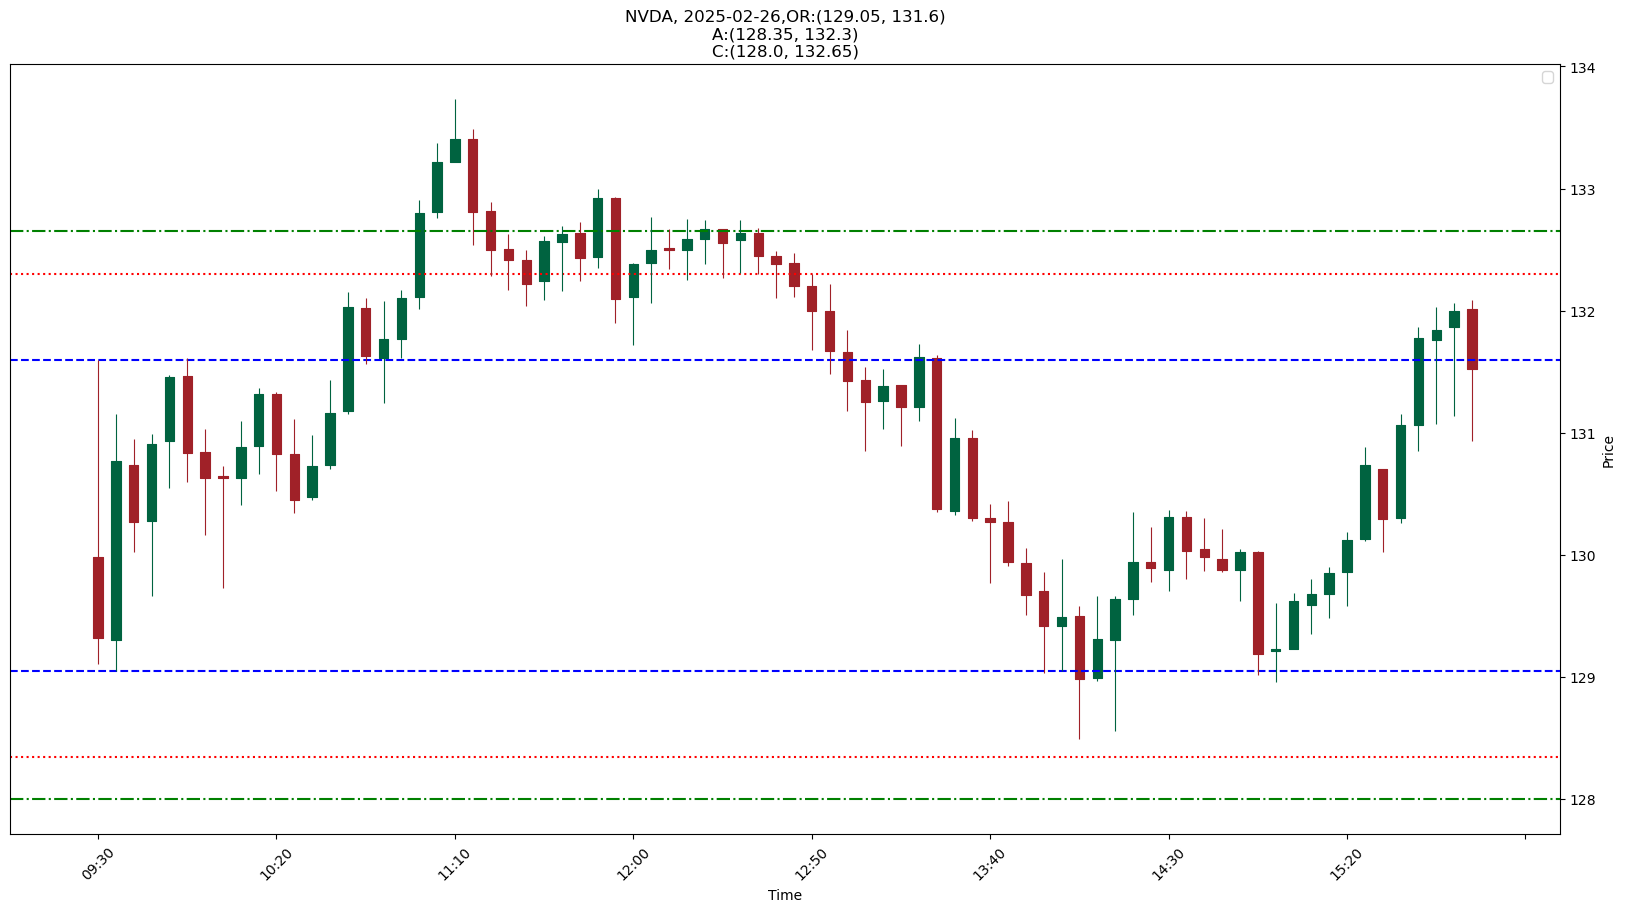

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


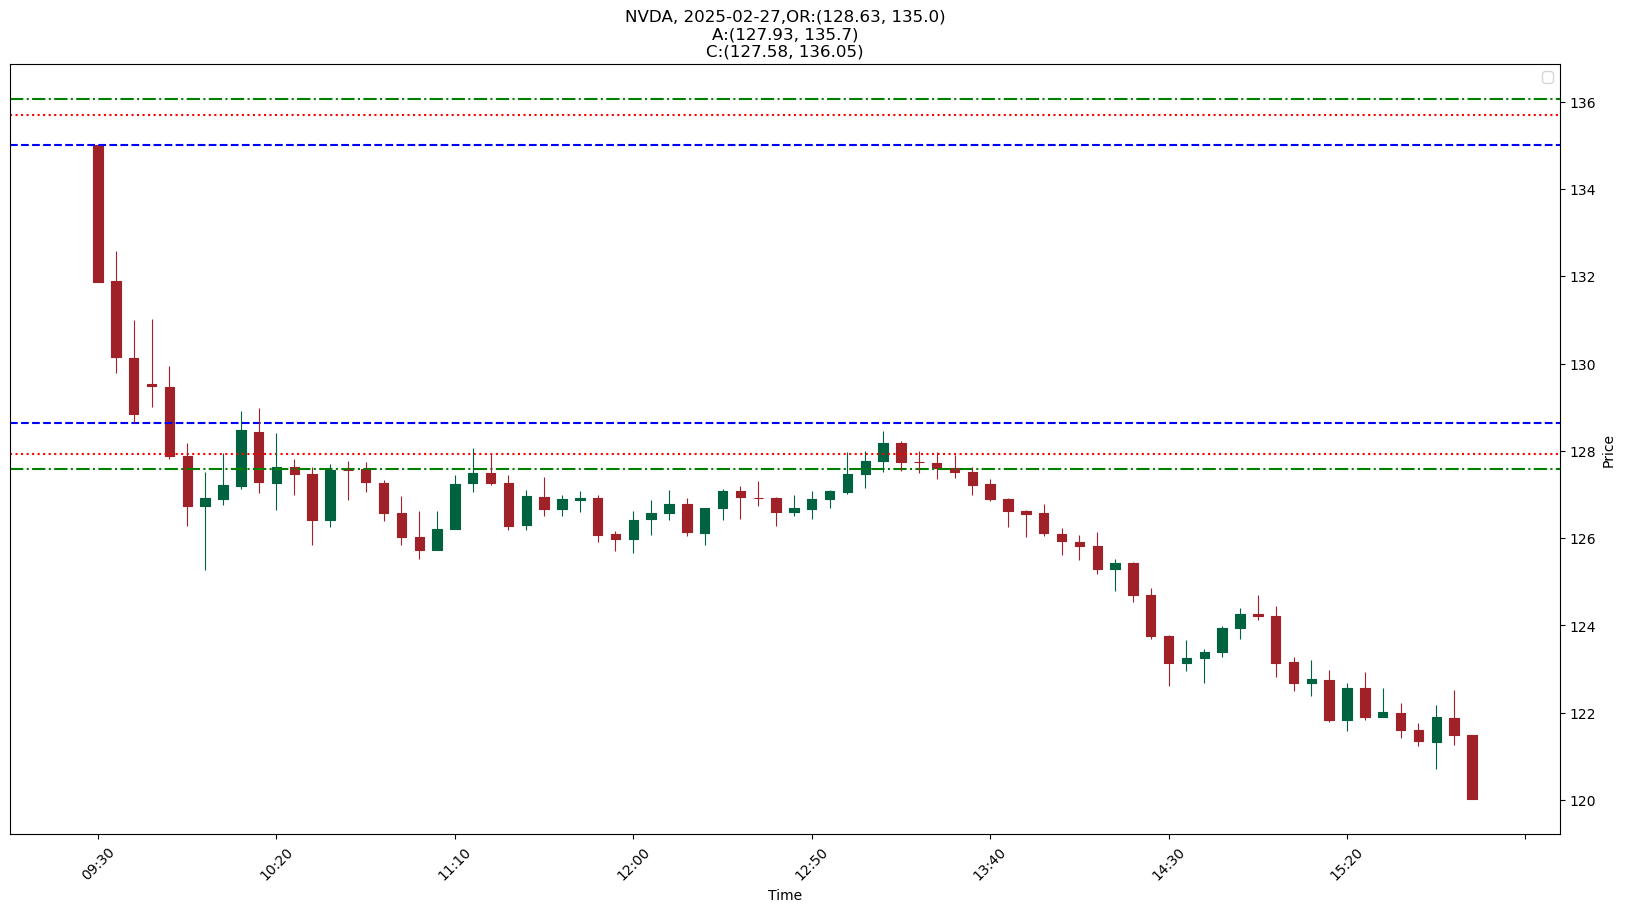

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


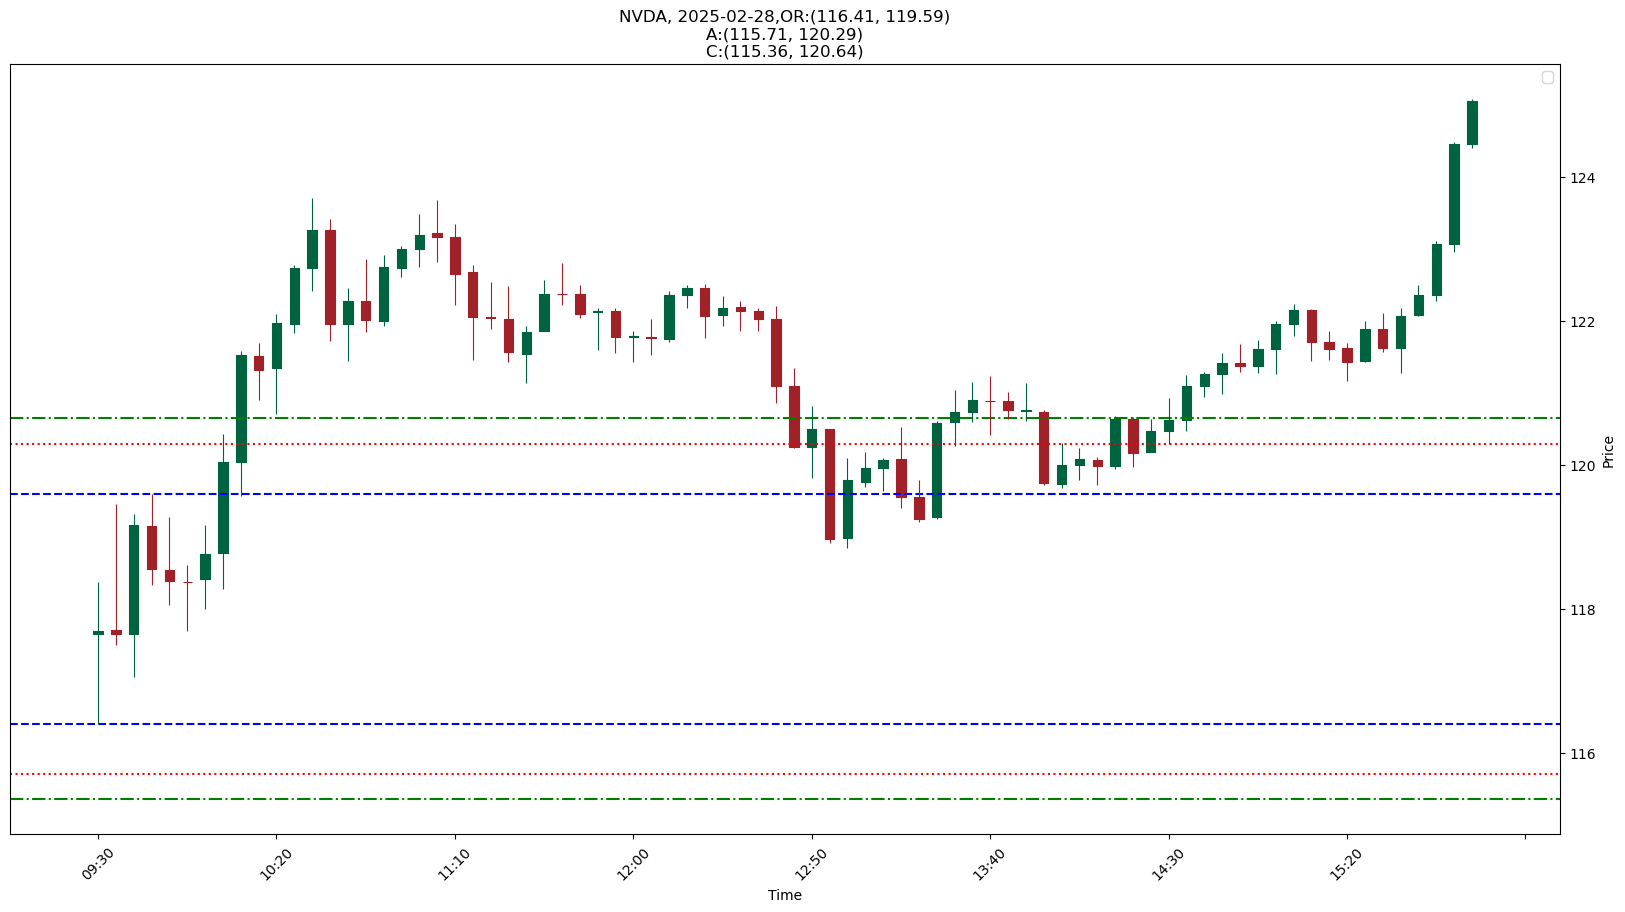

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


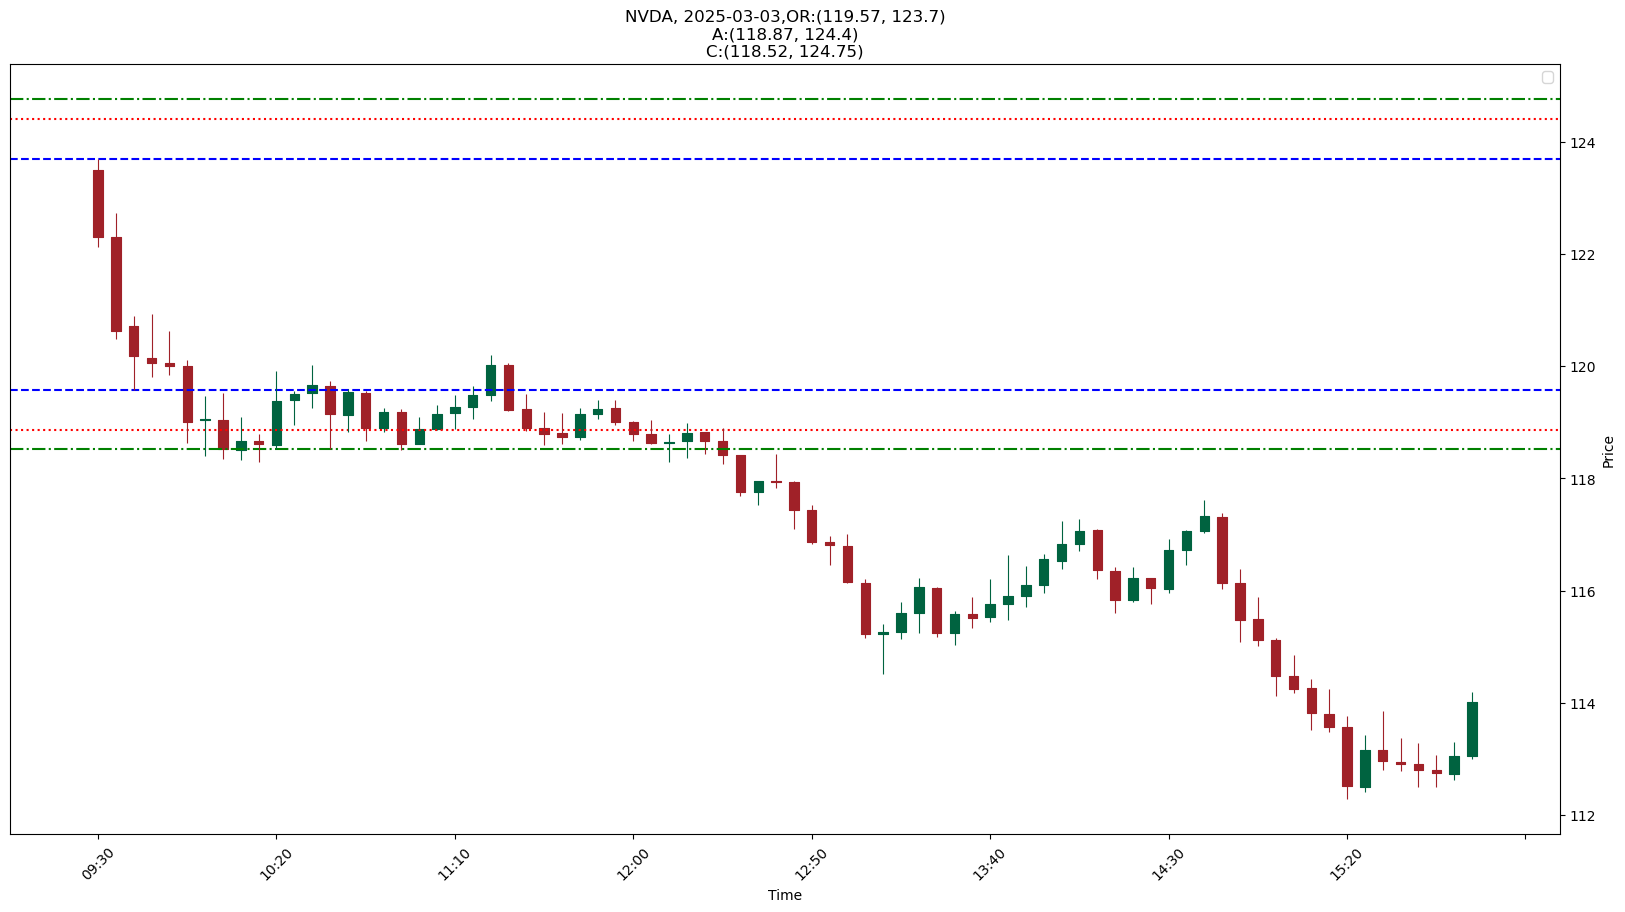

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


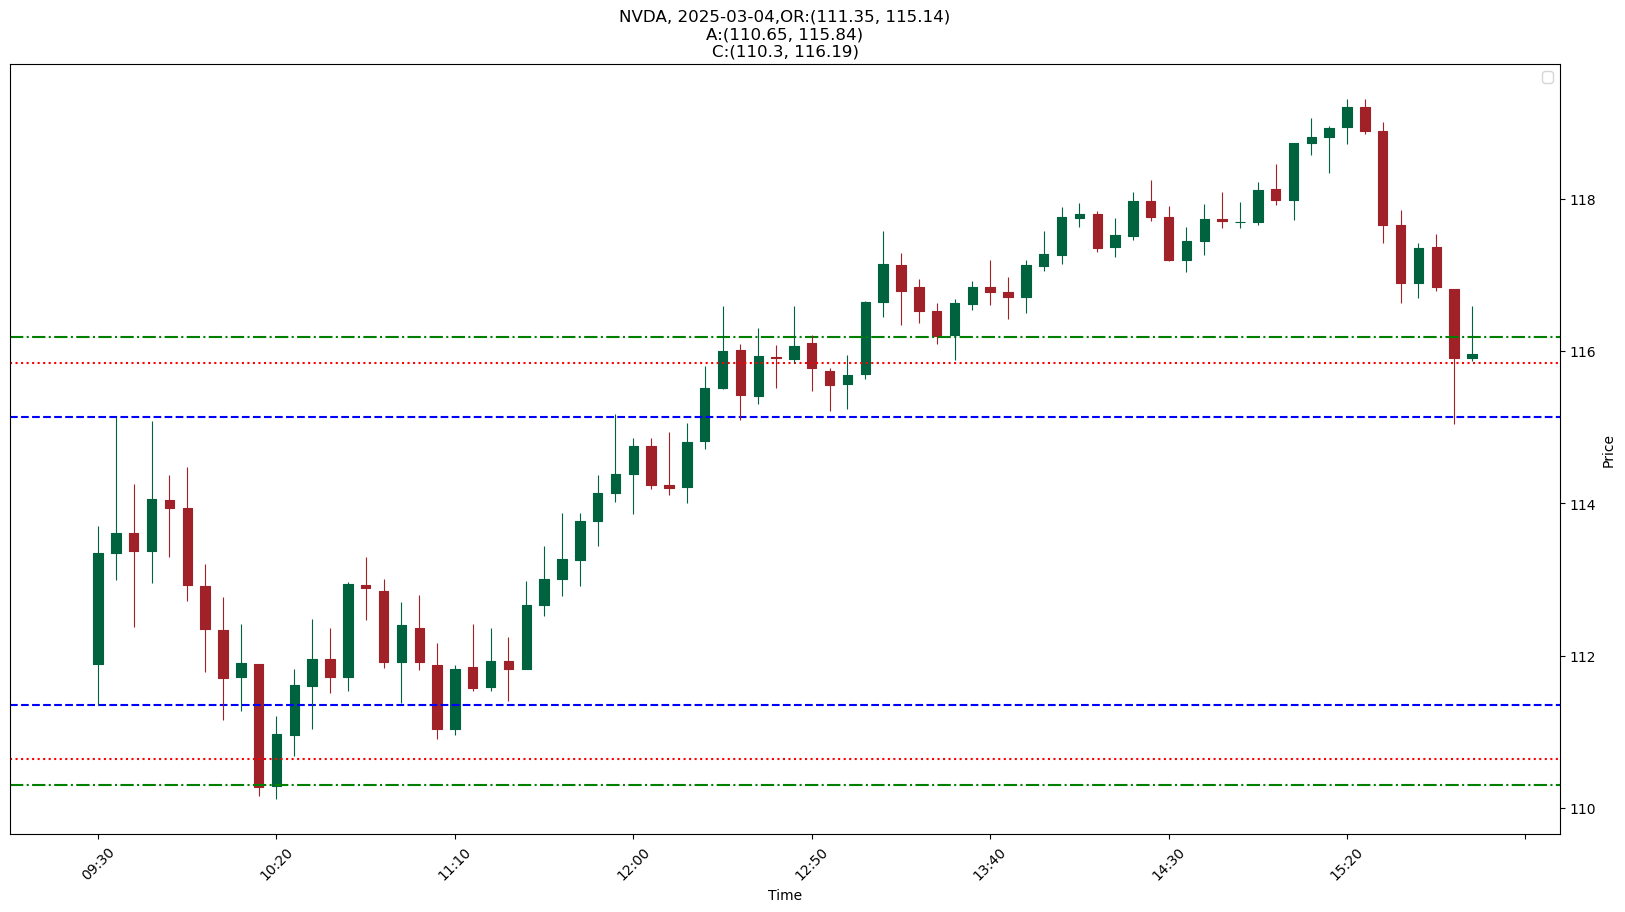

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


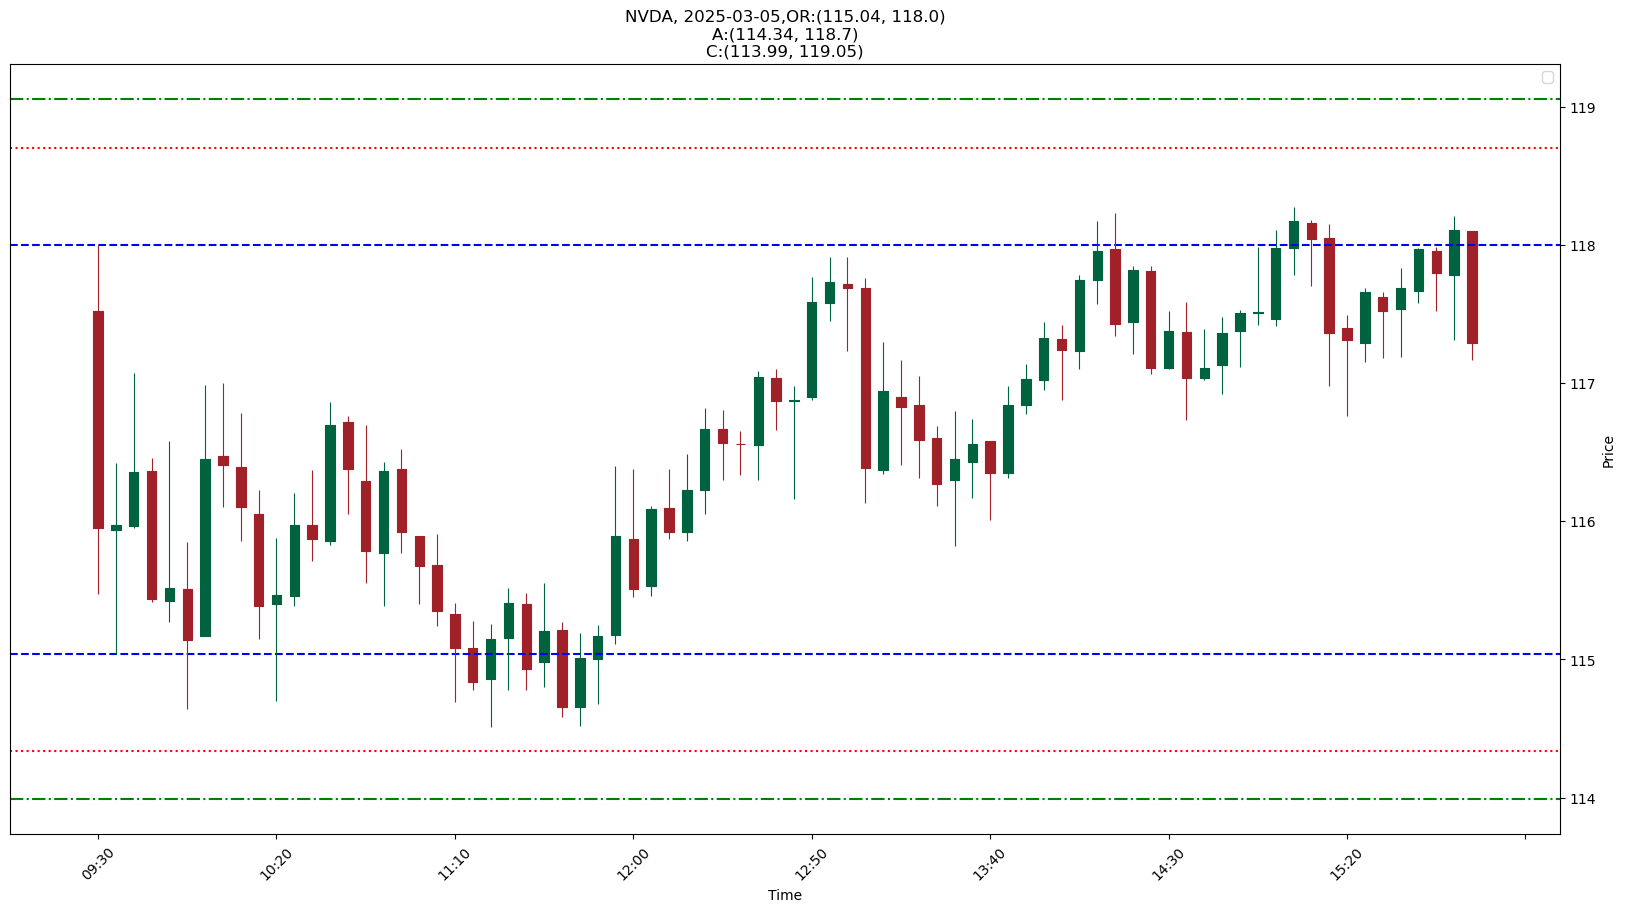

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


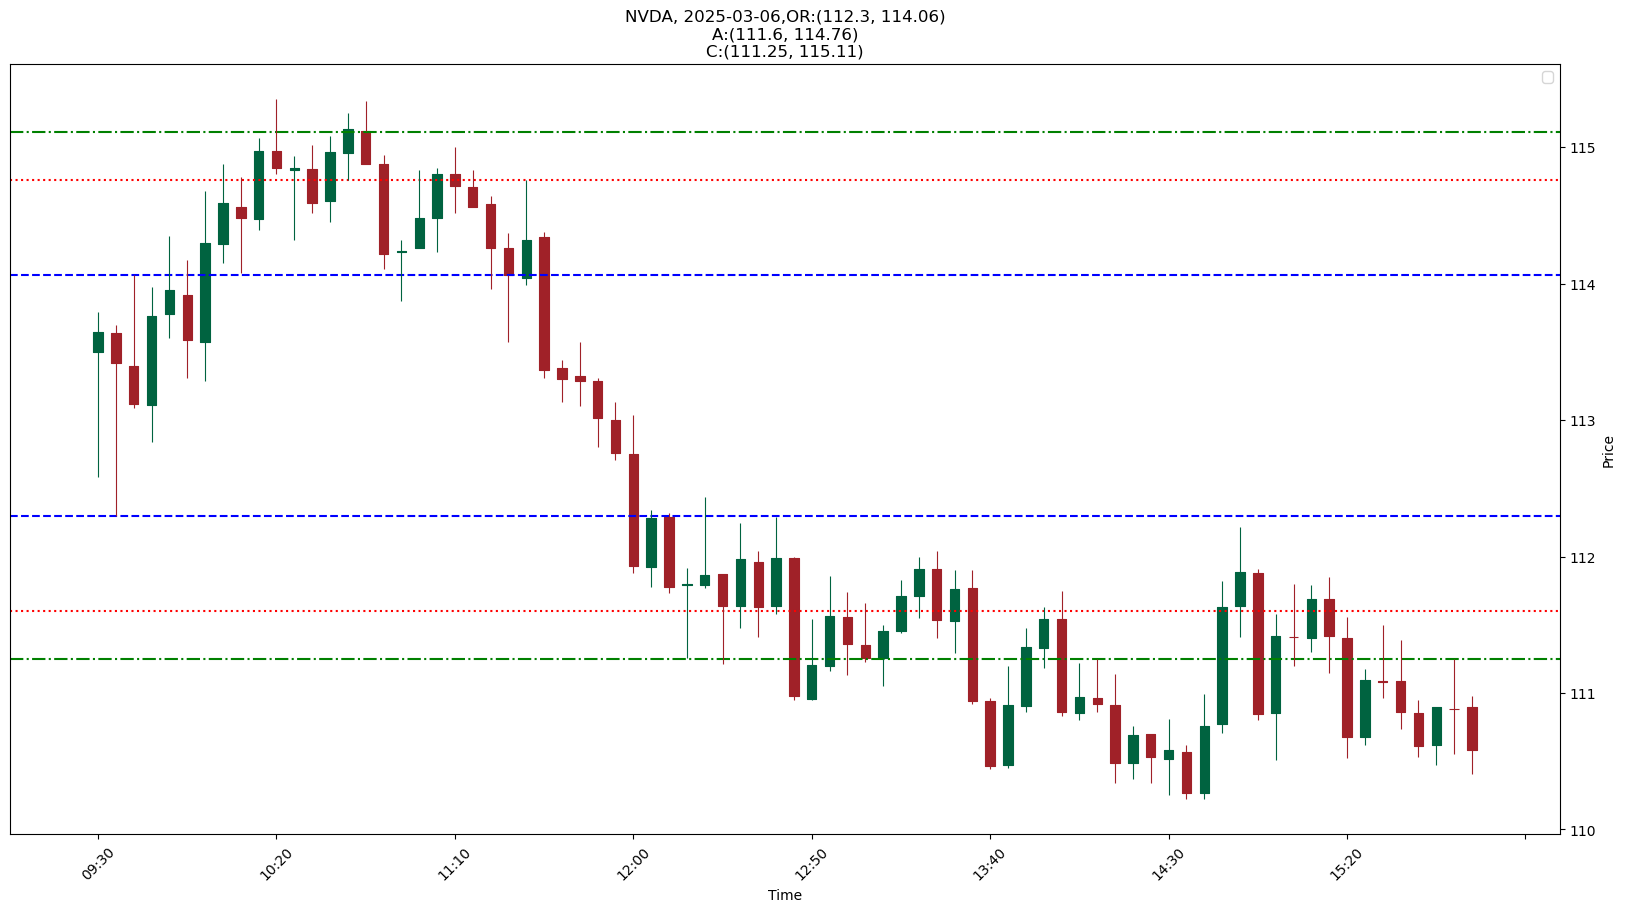

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


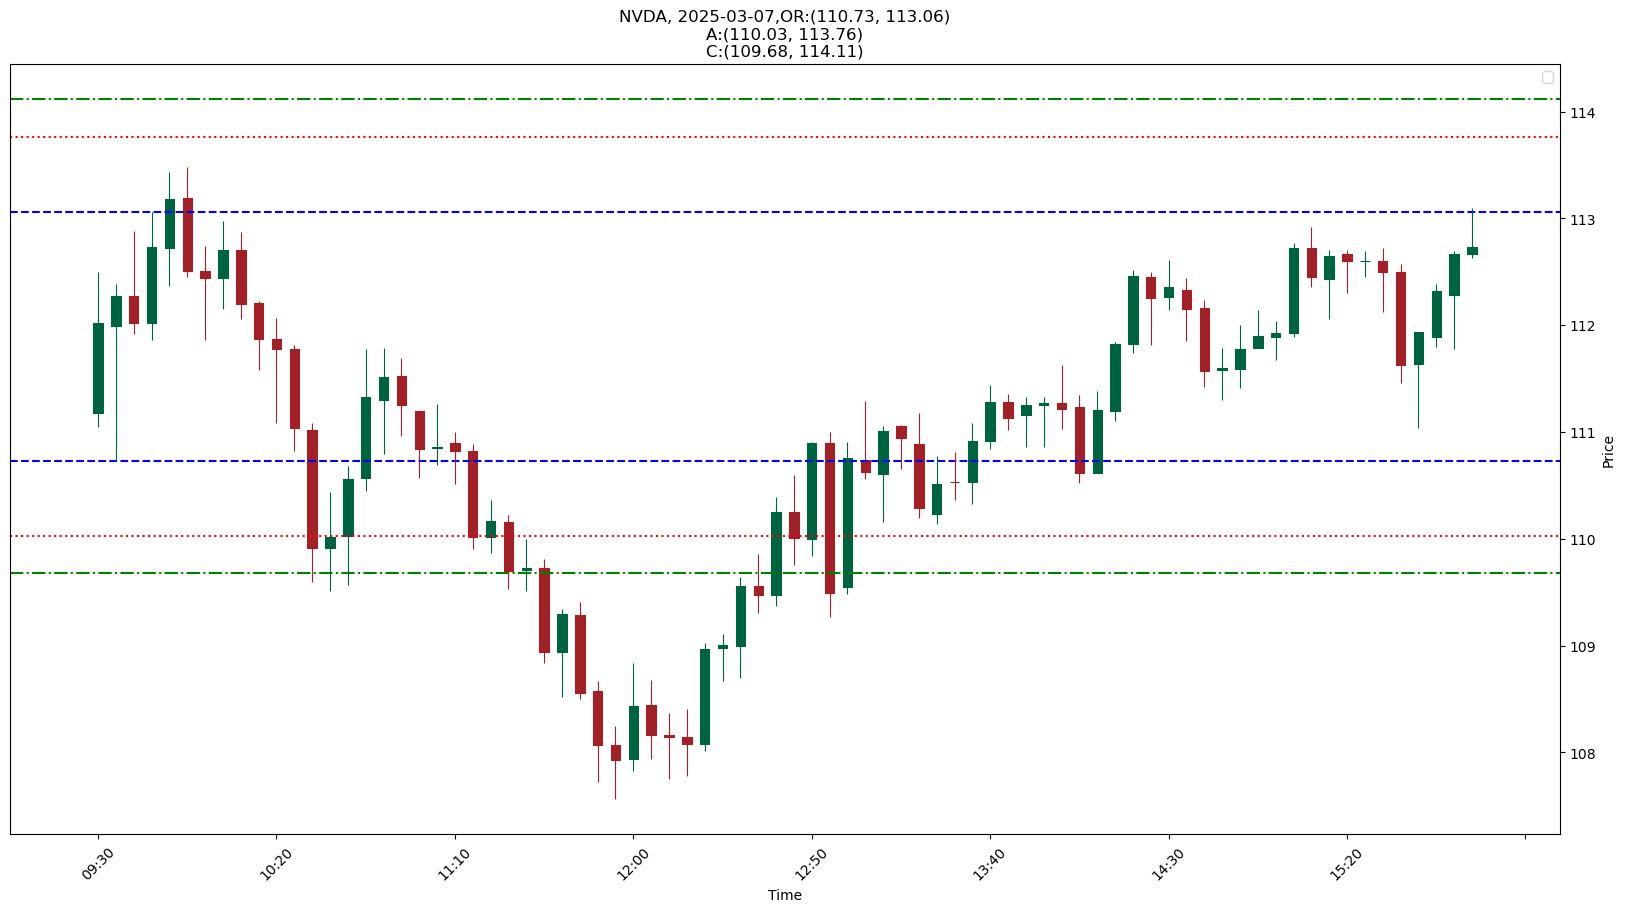

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


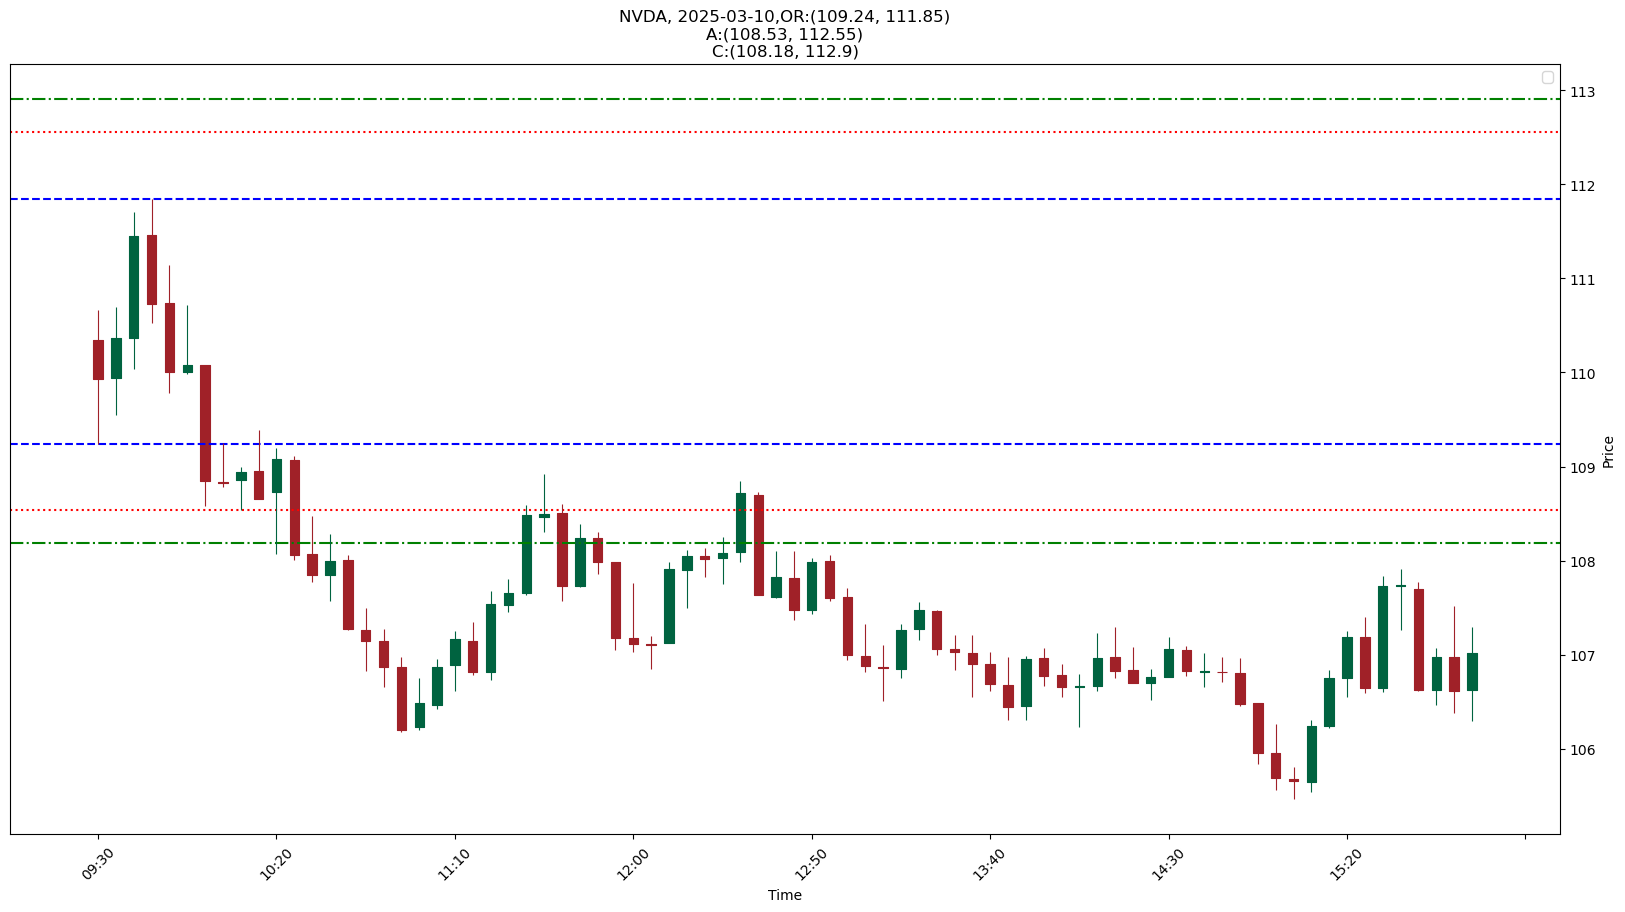

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


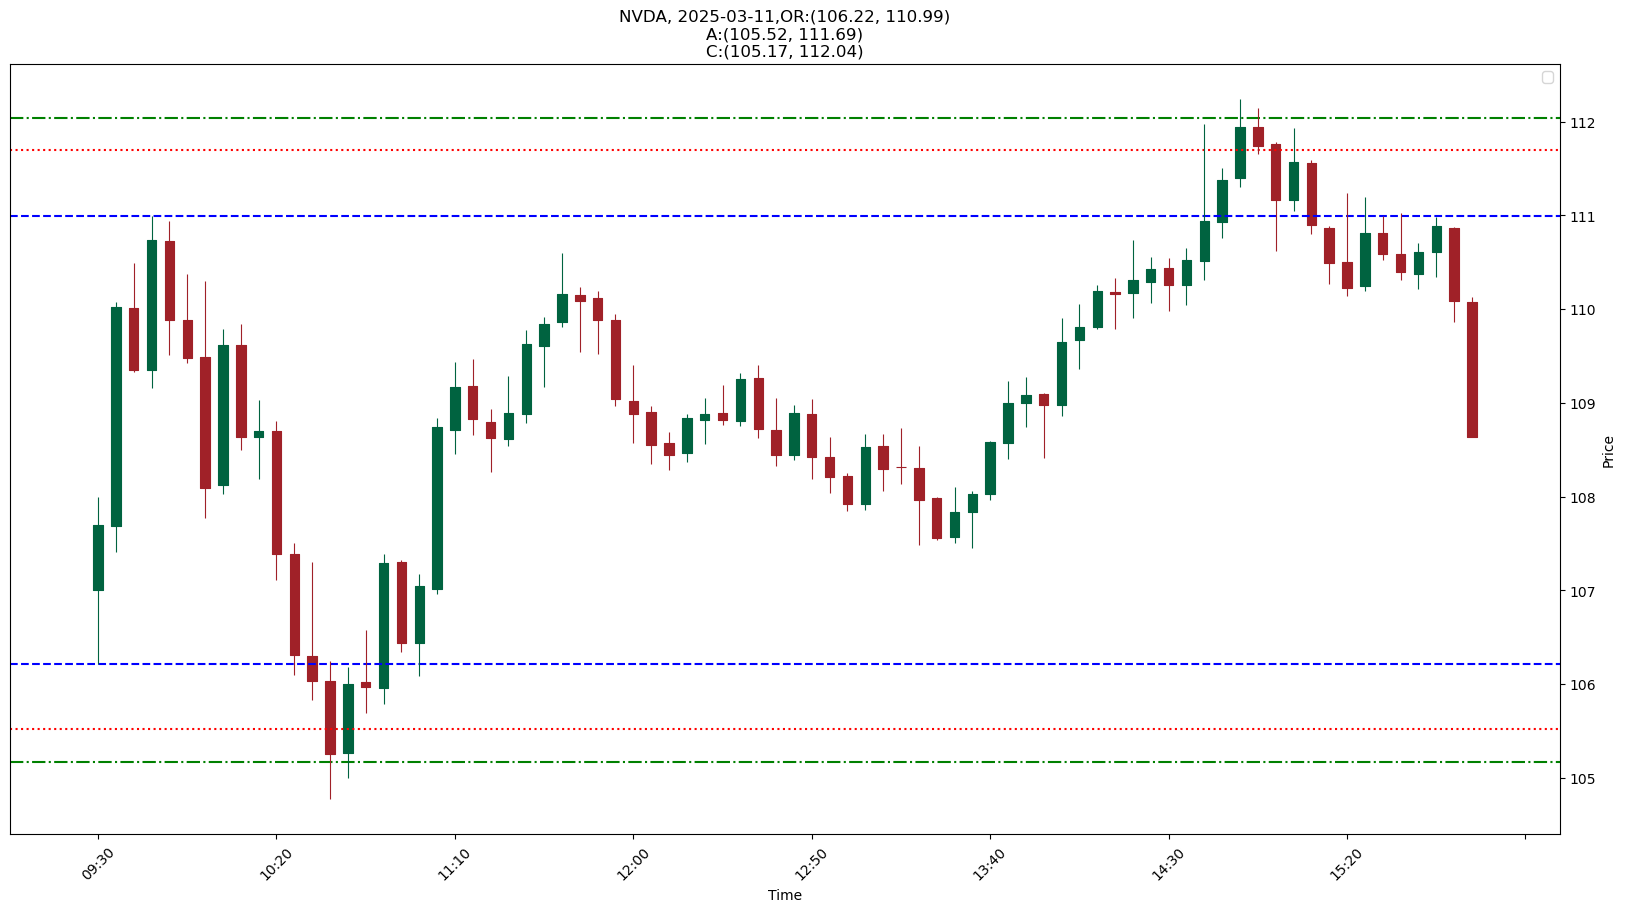

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


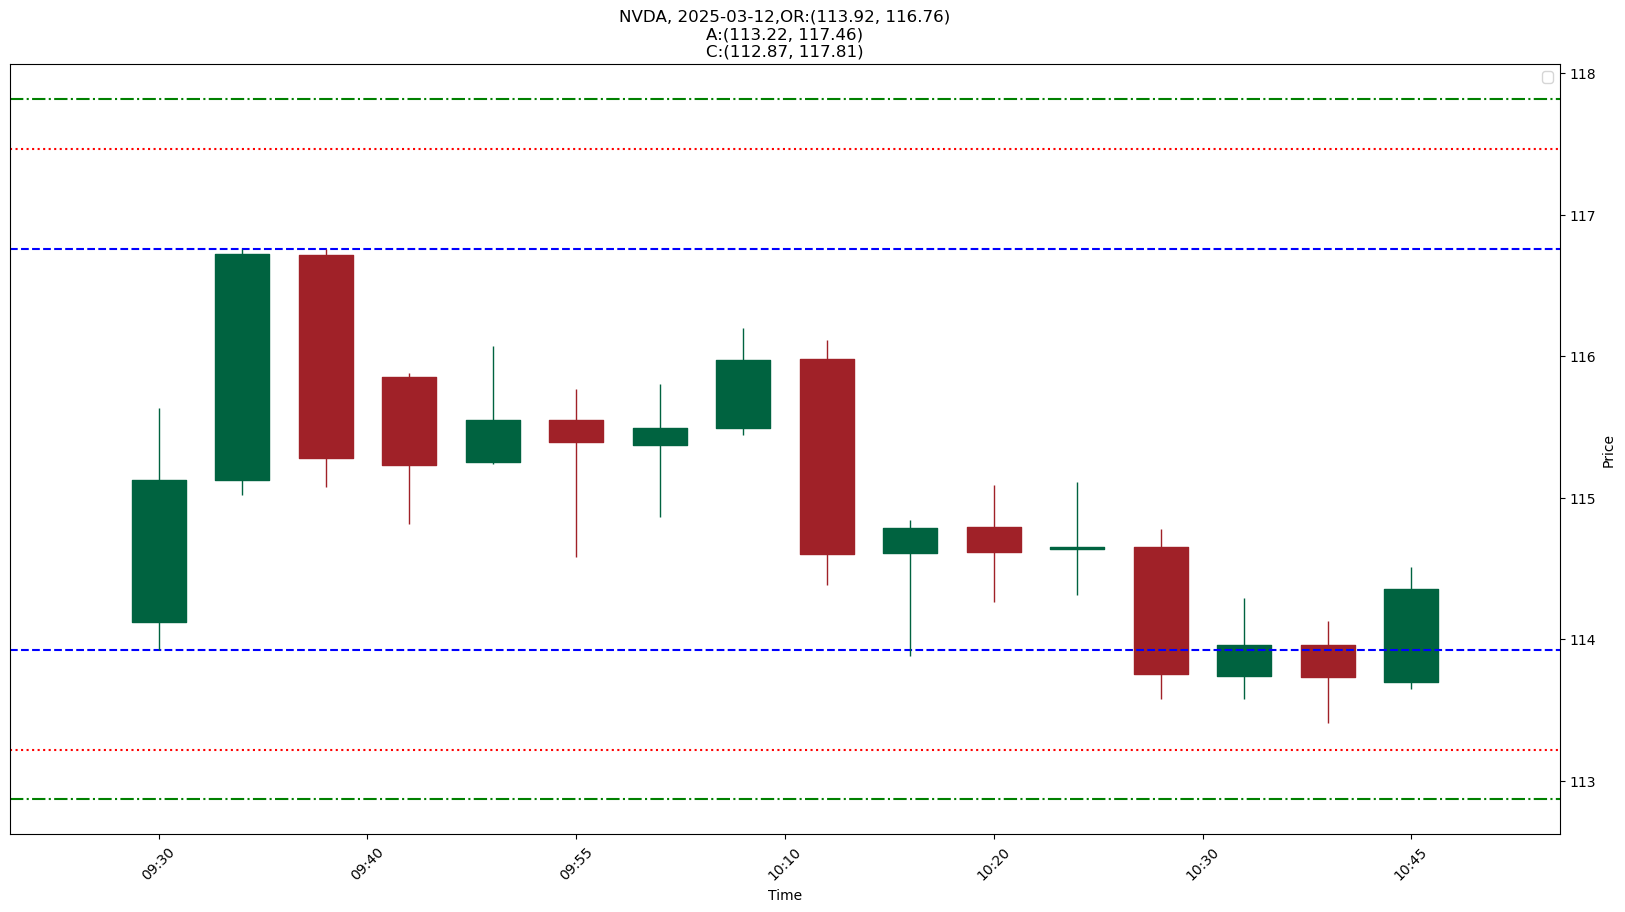

In [45]:


# Define opening range
opening_range_minutes = 15  # Default opening range (modifiable)
market_open_time = "09:30"
market_close_time = "16:00"

# Group data by day and create separate plots
for date, day_data in data.groupby(data.index.date):
    day_data = day_data.between_time(market_open_time, market_close_time)
    
    # Calculate opening range for each day
    opening_range = day_data.between_time(market_open_time, (pd.to_datetime(market_open_time, format="%H:%M") + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"))
    openRangeHigh = opening_range["High"].max()
    openRangeLow = opening_range["Low"].min()
    
    # Define ACD levels
    A_Level = 0.1*atr # Customizable multiplier
    A_Up = openRangeHigh + A_Level
    A_Down = openRangeLow - A_Level
    
    C_Level = 0.15*atr  # Customizable multiplier
    C_Up = openRangeHigh + C_Level
    C_Down = openRangeLow - C_Level
    
    # Create a new figure for each day
    fig, ax = plt.subplots(figsize=(20, 10))
    
   
    # Plot Opening Range High/Low
    ax.axhline(y=openRangeHigh, color='blue', linestyle='--')
    ax.axhline(y=openRangeLow, color='blue', linestyle='--')
    
    # Plot ACD Levels
    ax.axhline(y=A_Up, color='red', linestyle='dotted')
    ax.axhline(y=A_Down, color='red', linestyle='dotted')
    ax.axhline(y=C_Up, color='green', linestyle='-.')
    ax.axhline(y=C_Down, color='green', linestyle='-.')
    
    
    # Filter the full day's price data instead of last 1 hour
    full_day_data = day_data
    
    # Plot candlestick chart
    mpf.plot(full_day_data, type='candle', ax=ax, style='charles', volume=False)
    
    ax.set_xlabel("Time")
    ax.set_ylabel(f"Price")
    ax.set_title(f"{symbol}, {date},OR:{round(openRangeLow,2),round(openRangeHigh,2)}\nA:{round(A_Down,2),round(A_Up,2)}\nC:{round(C_Down,2),round(C_Up,2)}")
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

# With pivot (it has problem)

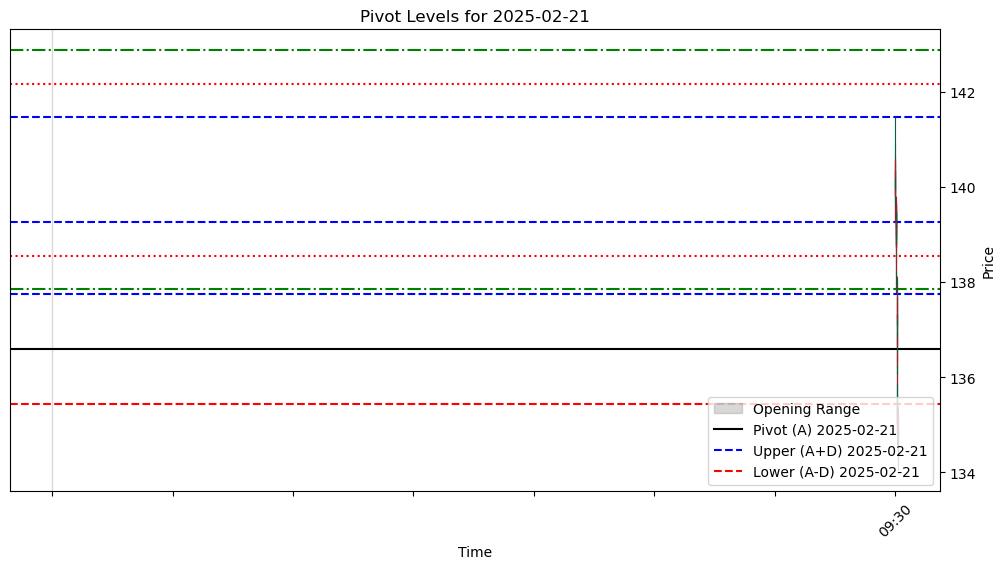

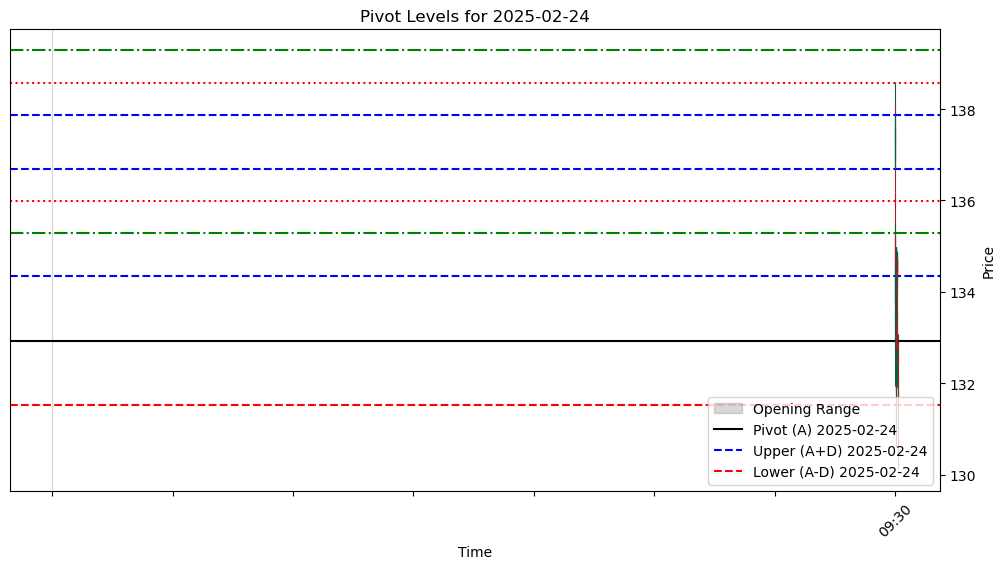

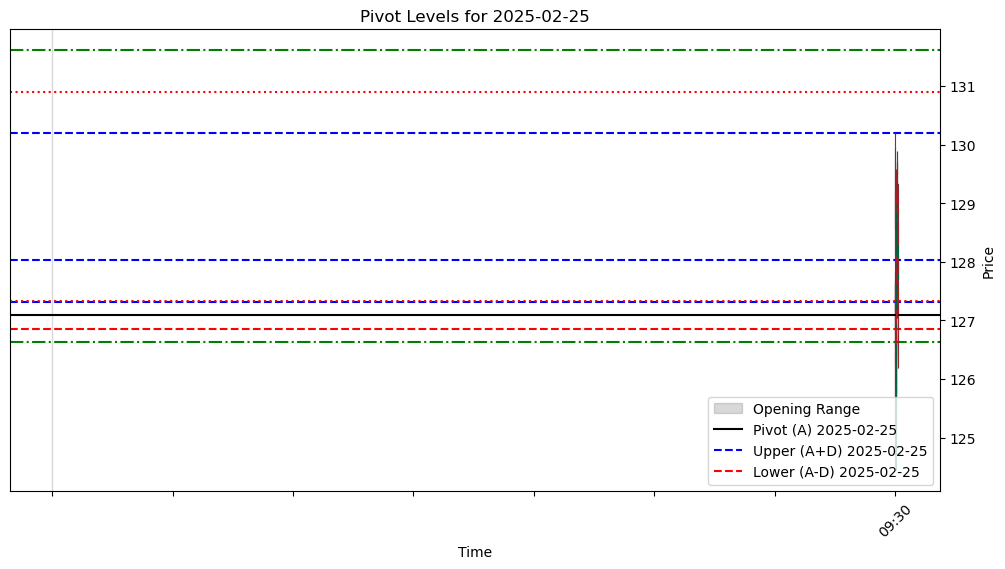

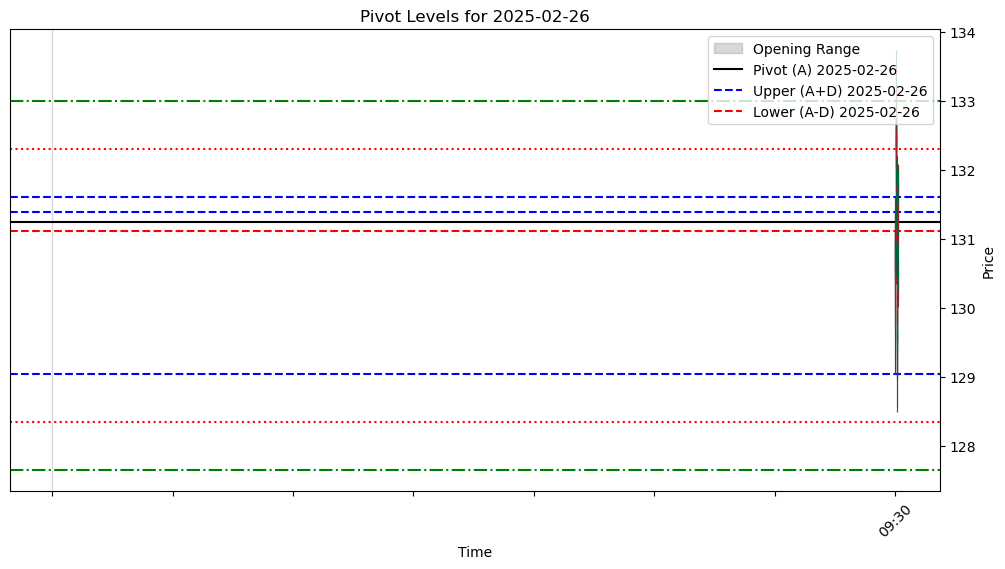

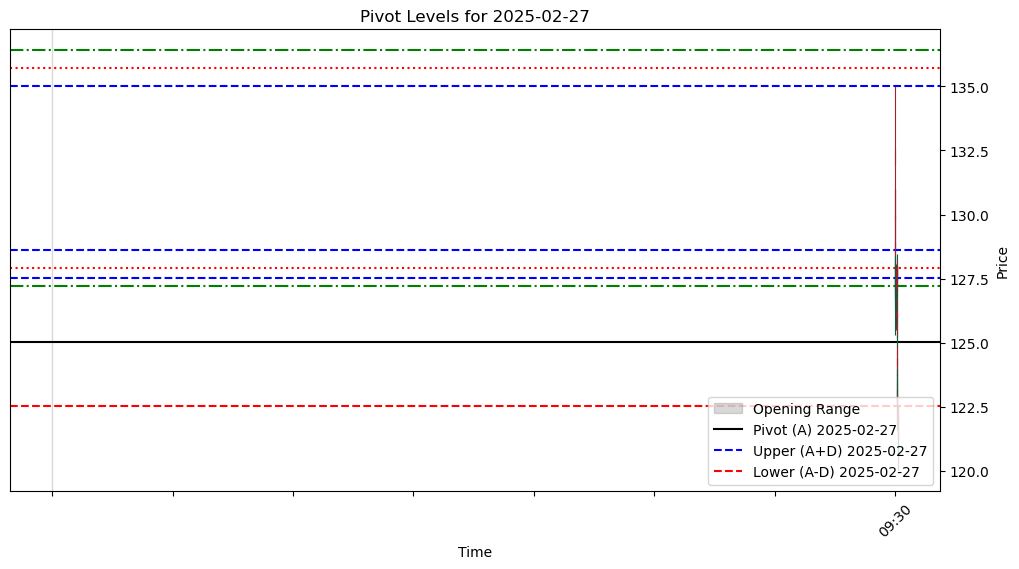

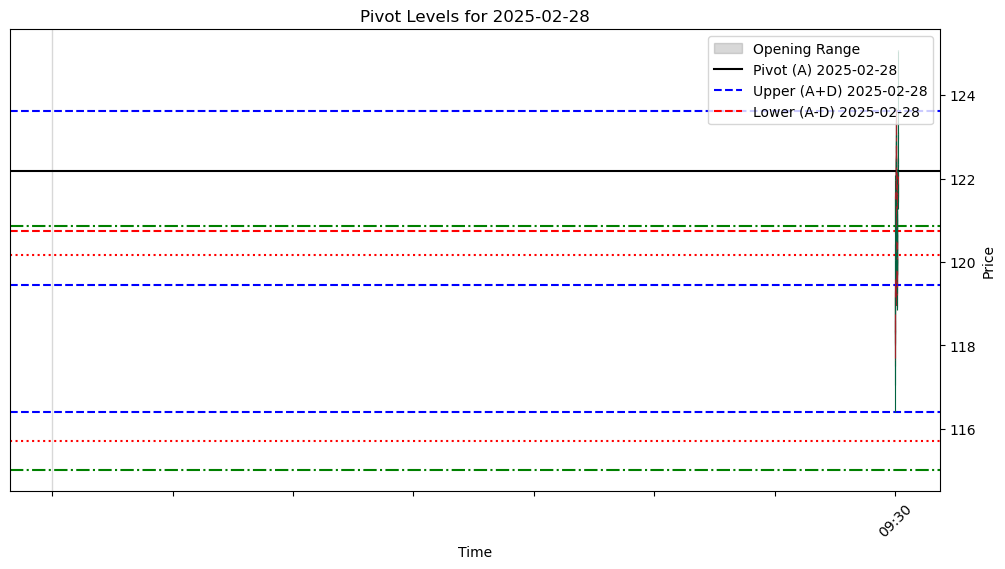

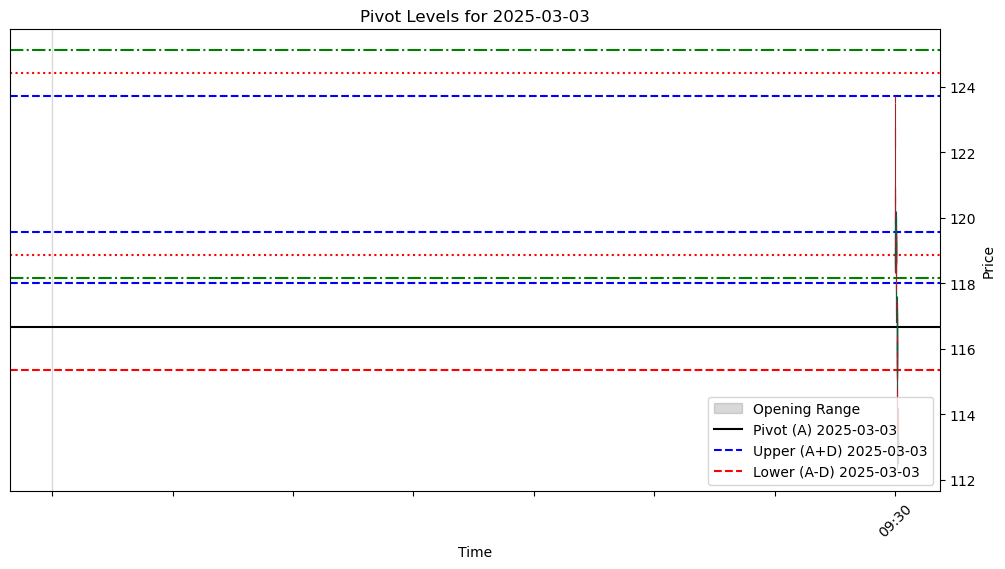

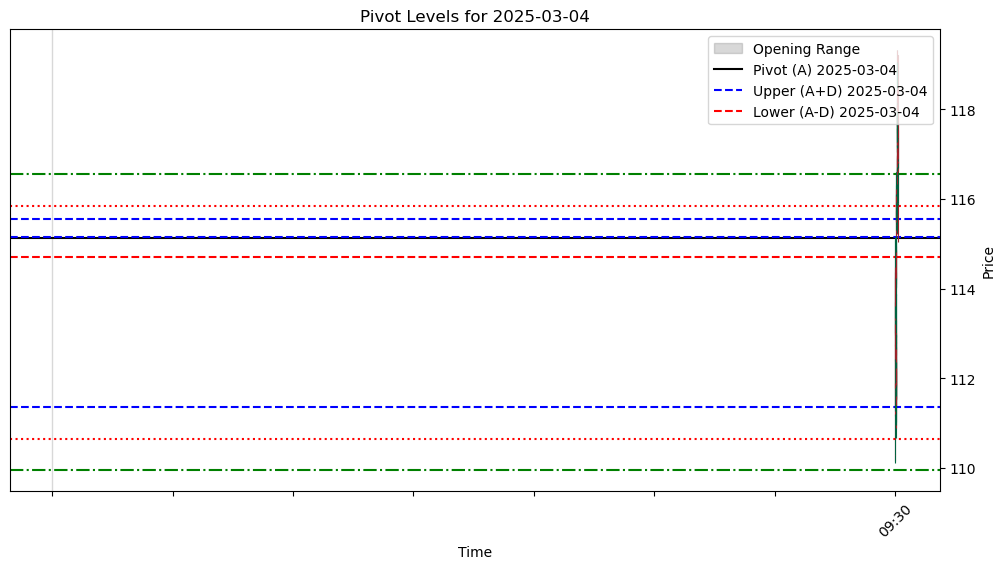

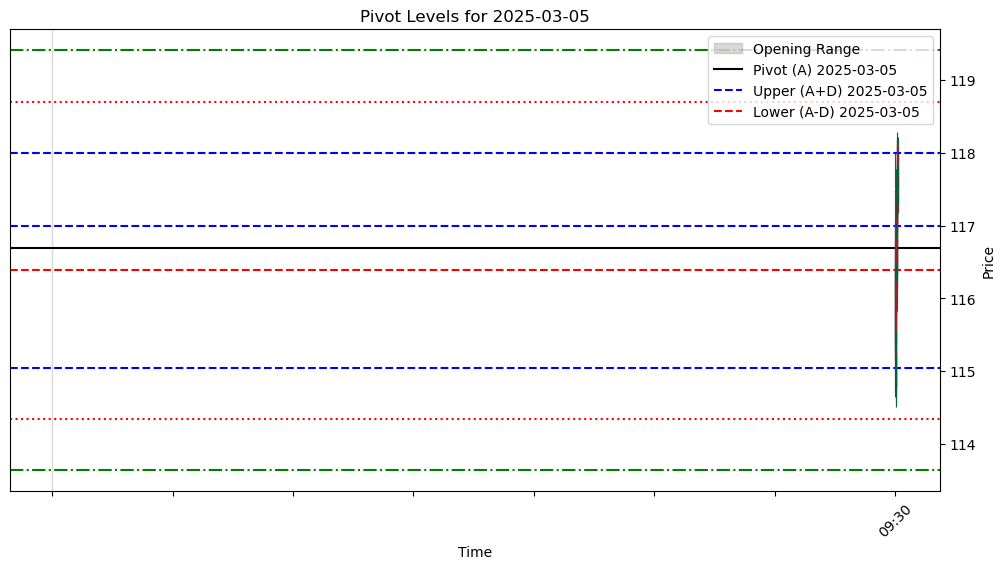

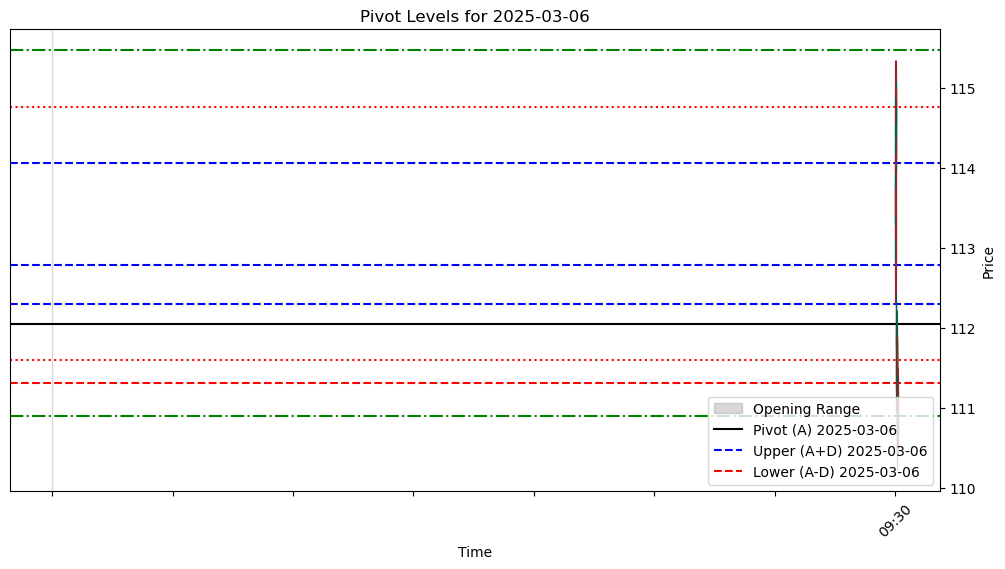

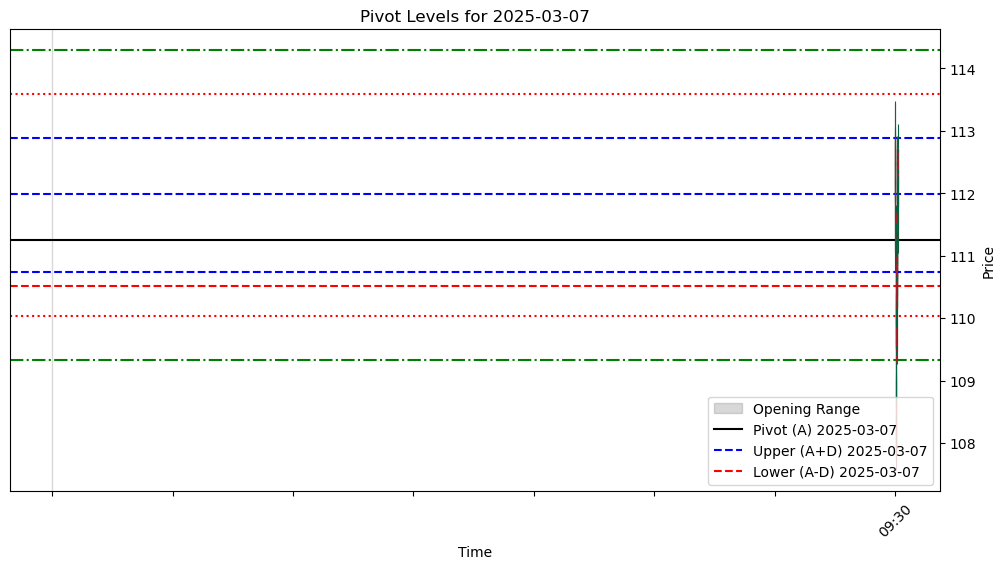

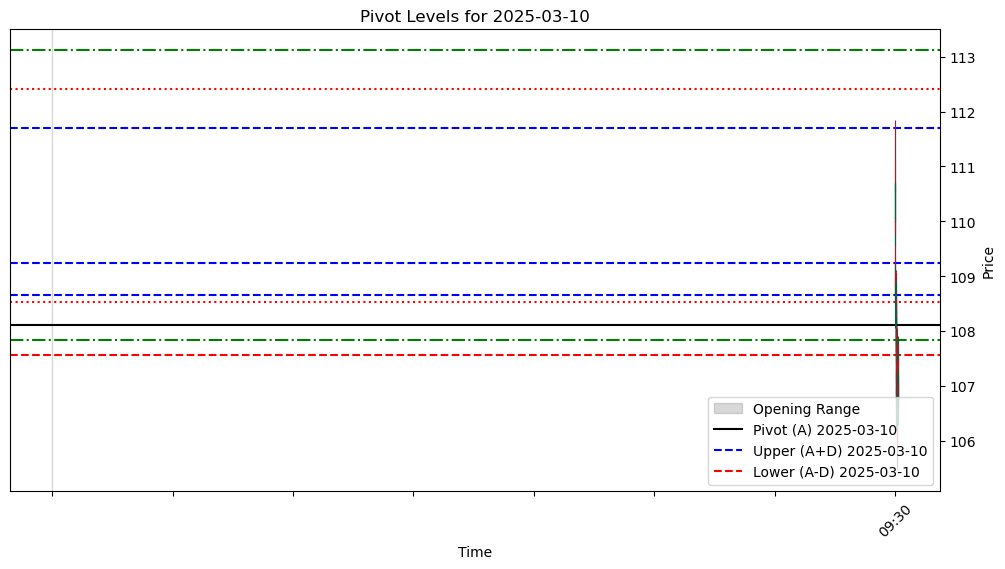

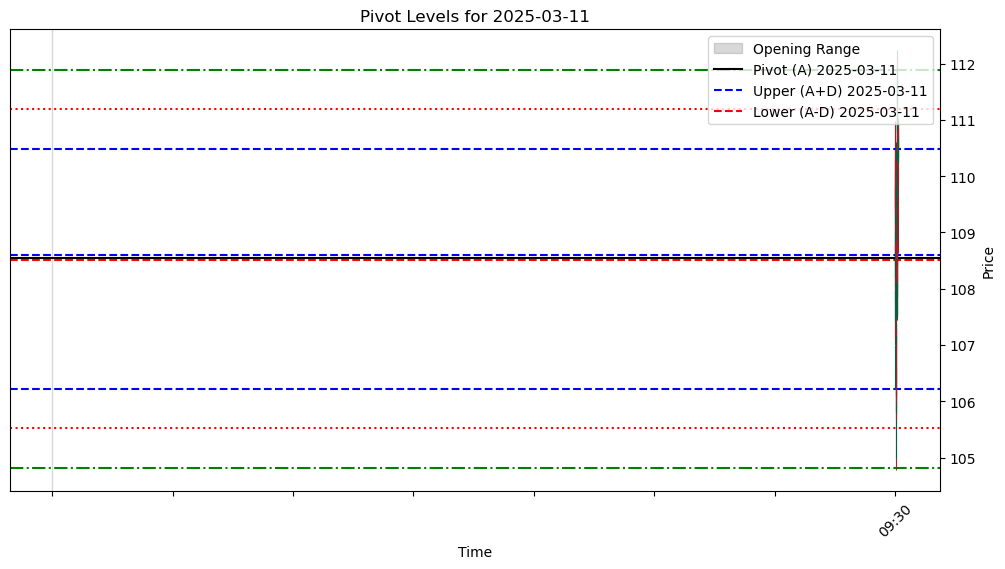

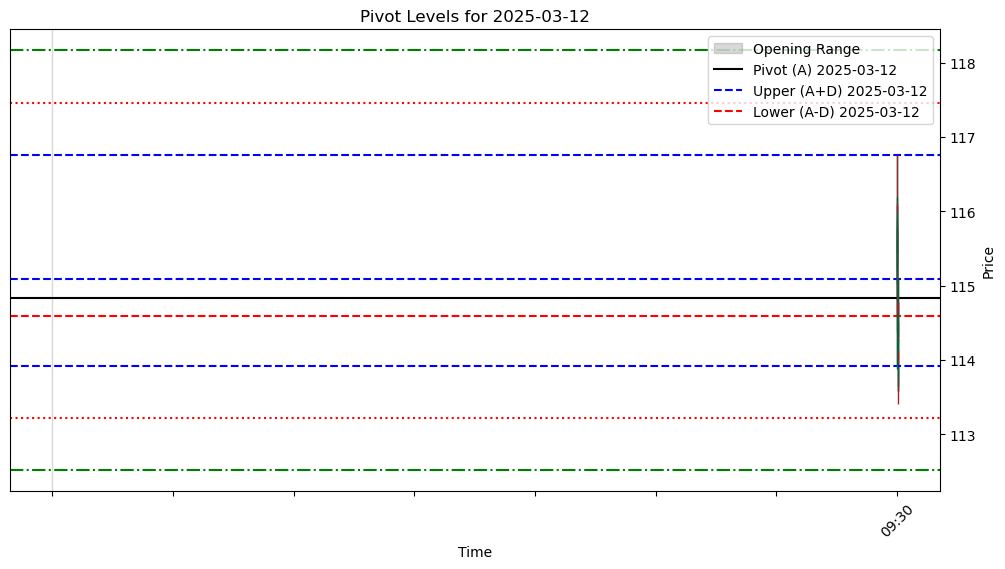

In [46]:


# Define opening range
opening_range_minutes = 12  # Default opening range (modifiable)
market_open_time = "09:30"
market_close_time = "16:00"

# Group data by day and create separate plots
for date, day_data in data.groupby(data.index.date):
    day_data = day_data.between_time(market_open_time, market_close_time)
    
    # Calculate opening range for each day
    opening_range = day_data.between_time(market_open_time, (pd.to_datetime(market_open_time, format="%H:%M") + pd.Timedelta(minutes=opening_range_minutes)).strftime("%H:%M"))
    openRangeHigh = opening_range["High"].max()
    openRangeLow = opening_range["Low"].min()
    
    # Define ACD levels
    A_Level = 0.1*atr # Customizable multiplier
    A_Up = openRangeHigh + A_Level
    A_Down = openRangeLow - A_Level
    
    C_Level = 0.2*atr  # Customizable multiplier
    C_Up = openRangeHigh + C_Level
    C_Down = openRangeLow - C_Level
    
      # Calculate Pivot Formula
    A = (day_data["High"].max() + day_data["Low"].min() + day_data["Close"].iloc[-1]) / 3
    B = (day_data["High"].max() + day_data["Low"].min()) / 2
    D = abs(A - B)
    
    upper_line = A + D
    lower_line = A - D
     # Create a new figure for each day
    fig, ax = plt.subplots(figsize=(12, 6))
     # Highlight opening range period
    ax.axvspan(pd.to_datetime(market_open_time, format="%H:%M"),
               pd.to_datetime(market_open_time, format="%H:%M") + pd.Timedelta(minutes=30),
               color='gray', alpha=0.3, label="Opening Range")
      # Draw pivot lines
    ax.axhline(y=A, color='black', linestyle='-', label=f"Pivot (A) {date}")
    ax.axhline(y=upper_line, color='blue', linestyle='--', label=f"Upper (A+D) {date}")
    ax.axhline(y=lower_line, color='red', linestyle='--', label=f"Lower (A-D) {date}")
    ax.axhline(y=openRangeHigh, color='blue', linestyle='--')
    ax.axhline(y=openRangeLow, color='blue', linestyle='--')
    
    # Plot ACD Levels
    ax.axhline(y=A_Up, color='red', linestyle='dotted')
    ax.axhline(y=A_Down, color='red', linestyle='dotted')
    ax.axhline(y=C_Up, color='green', linestyle='-.')
    ax.axhline(y=C_Down, color='green', linestyle='-.')
    # Filter the full day's price data
    full_day_data = day_data
    
    # Plot candlestick chart
    mpf.plot(full_day_data, type='candle', ax=ax, style='charles', volume=False)
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Price")
    ax.set_title(f"Pivot Levels for {date}")
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()
    # # Create a new figure for each day
    # fig, ax = plt.subplots(figsize=(10, 4))
    
   
    # Plot Opening Range High/Low
    # ax.axhline(y=openRangeHigh, color='blue', linestyle='--')
    # ax.axhline(y=openRangeLow, color='blue', linestyle='--')
    
    # # Plot ACD Levels
    # ax.axhline(y=A_Up, color='red', linestyle='dotted')
    # ax.axhline(y=A_Down, color='red', linestyle='dotted')
    # ax.axhline(y=C_Up, color='green', linestyle='-.')
    # ax.axhline(y=C_Down, color='green', linestyle='-.')
    
    
    # # Filter the full day's price data instead of last 1 hour
    # full_day_data = day_data
    
    # # Plot candlestick chart
    # mpf.plot(full_day_data, type='candle', ax=ax, style='charles', volume=False)
    
    # ax.set_xlabel("Time")
    # ax.set_ylabel(f"Price")
    # ax.set_title(f"{symbol}, {date},OR:{round(openRangeLow,2),round(openRangeHigh,2)}\nA:{round(A_Down,2),round(A_Up,2)}\nC:{round(C_Down,2),round(C_Up,2)}")
    # ax.legend()
    # plt.xticks(rotation=45)
    # plt.show()